We pretty much always want to start notebooks with this line:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Plotting distributions in Python

Suppose you observe a set of 8 different early-type (red sequence / non-star-forming / elliptical/S0) galaxies and observe AGN signatures from three of them.  What can we conclude about the probability p that a randomly chosen early-type galaxy has an AGN?

We want to plot the posterior distribution for our binomial case with different choices of prior.  

We plot the likelihood and the different priors below. __Which prior would you expect to have the greatest effect on your results?__

/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


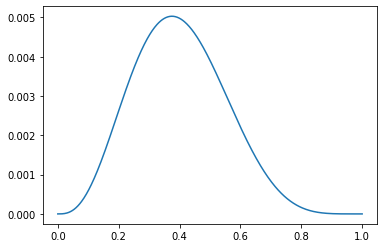

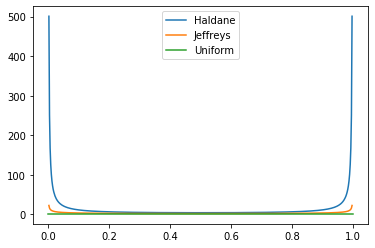

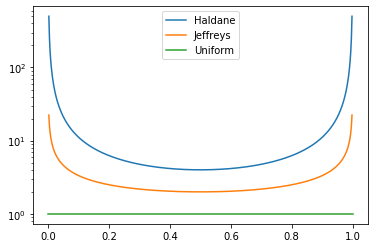

In [2]:
p=np.linspace(0.,1.,501) # set up an evenly-spaced array of probability values

# set up the likelihood function (unnormalized) and plot it.
likelihood=p**3 * (1-p)**5
plt.figure(0)
plt.plot(p,likelihood)

# set up the priors: Haldane, Jeffreys, and uniform
prior_h=1/p/(1-p)
prior_j=sqrt(prior_h)
prior_u=p*0.+1.

# Plot the priors (with different line styles/colors). 
plt.figure(1)
plt.plot(p,prior_h,label='Haldane')
plt.plot(p,prior_j,label='Jeffreys')
plt.plot(p,prior_u,label='Uniform')
plt.legend()

# Plot them with a log y axis (with different line styles/colors). 
plt.figure(2)
plt.semilogy(p,prior_h,label='Haldane')
plt.semilogy(p,prior_j,label='Jeffreys')
plt.semilogy(p,prior_u,label='Uniform')
plt.legend()

## Posterior distributions for each choice of prior

Now we want to plot the posterior probability distributions, using our likelihood and each possibility for the prior.

__Using a y range from 0 to 0.03, plot the likelihood and the posterior assuming each different prior, using different lines or plot symbols for each.__  (Note: you will want to use `plt.ylim()` to set the y range explicitly).

/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


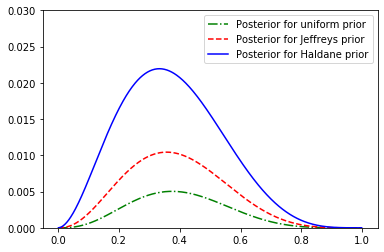

In [3]:
plt.plot(p, likelihood*prior_u, 'g-.', label = "Posterior for uniform prior")
plt.plot(p, likelihood*prior_j, 'r--', label = "Posterior for Jeffreys prior")
plt.plot(p, likelihood*prior_h, 'b-', label = "Posterior for Haldane prior")
plt.ylim(0, 0.03)
plt.legend()
plt.show()

# Which posterior is most strongly peaked (i.e., gives us the most aggressive constraints on p)?

To be able to compare the posteriors to each other, we really need to normalize them the same way.  I.e.: it's hard to tell the answer from this plot:

/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.
/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


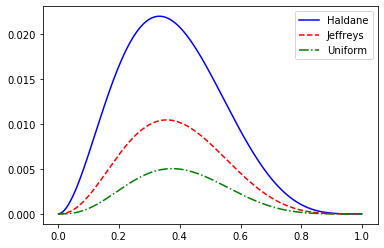

In [5]:
plt.plot(p,likelihood*prior_h,'b-',label = 'Haldane')
plt.plot(p,likelihood*prior_j,'r--',label='Jeffreys')
plt.plot(p,likelihood*prior_u,'g-.',label='Uniform')
plt.legend()

# Interpolation and Calculus in Python

A simple recipe for 1D integration in Python:

1) create arrays of x and f(x), where f(x) is the function you want to integrate or differentiate. 

2) Use `scipy.interpolate.interp1d()` to create a Python function (just like `np.sin(x)`, etc.) that interpolates between the tabulated values of x and f(x).  



(0, 6.283185307179586)

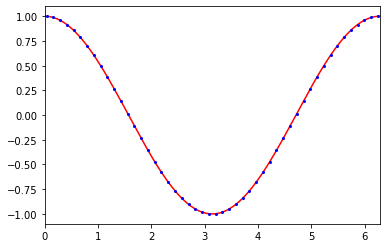

In [6]:
import scipy.interpolate as interpol
x = linspace(-np.pi,3*np.pi,100)
#we want interpolation table to extend beyond bounds we will use
x_fine = linspace(0,2*np.pi,10_000)
f = np.cos(x)
interp_f = interpol.interp1d(x,f,kind='cubic') 
# interp_f is a new Python function!
plt.plot( x_fine,interp_f(x_fine),'r-' )
plt.plot(x,f,'bo',markersize=2)
plt.xlim(0,2*np.pi)

__To integrate:__ one routine is `scipy.integrate.quad(function name, lower limit, upper limit)`

In [11]:
import scipy.integrate as integrate

# another trick with f-strings, added in Python 3.8: "f-string debugging"
# f'{expression=}' is the same as doing f'expression = {expression}' , where expressiomn is any Python expression

#print(f'{integrate.quad(interp_f,0,np.pi/2) = }')
print(f'{integrate.quad(interp_f,0,np.pi/2)}')
# note that the routine returns a tuple of the integral and an imperfect estimate of uncertainty
value,err = integrate.quad(interp_f,0,np.pi/2)
#print(f'{(1-value)/err = }')
print(f'{(1-value)/err}')

(0.999999696466759, 4.133725925475442e-09)
73.42848714656547


__To differentiate__: one routine is `scipy.misc.derivative(function name,x value[s],dx=[dx value for calculations])`.  E.g.:

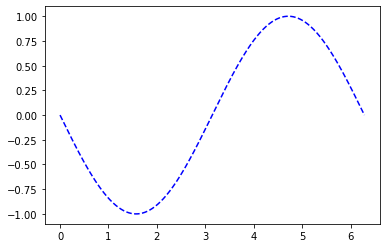

In [12]:
import scipy.misc as misc
der = misc.derivative(interp_f,x_fine,dx=1E-3)
plt.plot(x_fine,der,'b--')

## Calculating our normalizations

__In the below code box, calculate the normalizations for each posterior that you'd divide by to force the integral of the posterior to be one.__ I've done one example for you.

In [13]:
#set up variables for each posterior
posterior_u = interpol.interp1d(p,likelihood*prior_u,kind='cubic')
posterior_j = interpol.interp1d(p,likelihood*prior_j,kind='cubic')
posterior_h = interpol.interp1d(p,likelihood*prior_h,kind='cubic')

# calculate the integral of each posterior, to figure out the normalization
norm_u=(integrate.quad(posterior_u,0.,1.))[0]
norm_j=(integrate.quad(posterior_j,0.,1.))[0]
norm_h=(integrate.quad(posterior_h,0.,1.))[0]
# we need the [0] because we want the first element of the output tuple

# Did this work?
#print(f'{norm_u = } , {norm_j = } , {norm_h = }')
print(f'{norm_u} , {norm_j} , {norm_h}')

0.001984126984341079 , nan , nan


/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  
/mnt/sda5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if __name__ == '__main__':


# Dealing with NaNs (not-a-numbers)

2 options:

1) never generate them in the first place.  This one isn't very interesting or very general:

In [14]:
prob_u=likelihood
prob_h=p**2*(1-p)**4
prob_j=p**2.5*(1-p)**4.5

posterior_u = interpol.interp1d(p,prob_u,kind='cubic')
norm_u=(integrate.quad(posterior_u,0.,1.))[0]


posterior_h = interpol.interp1d(p,prob_h,kind='cubic')
norm_h=(integrate.quad(posterior_h,0.,1.))[0]


posterior_j = interpol.interp1d(p,prob_j,kind='cubic')
norm_j=(integrate.quad(posterior_j,0.,1.))[0]

# Did this work?
#print(f'{norm_u = } , {norm_j = } , {norm_h = }')
print(f'{norm_u} , {norm_j} , {norm_h}')

0.001984126984341079 , 0.004314320952674508 , 0.009523809523109324


2) Use `np.isfinite()` and `np.where()` to find and fix the problematic values

np.isfinite() tests each value in an array to see if it is finite (not infinity/NaN) or not.  __Explain the below results to your group:__

In [16]:
print( np.sum(np.isfinite(p)==False) )
print( np.sum(np.isfinite(prior_u)==False) )
print( np.sum(np.isfinite(prior_h)==False) )
print( np.sum(np.isfinite(prior_j)==False) )

0
0
2
2


# `np.where`

One of the most powerful python functions!  Returns the __array indices__ where some condition is true.  __Explain the below results.__  

In [17]:
test=np.array([1,2,3,4,5.])
print( np.where(test == 3) )
print( np.where(test > 2) )
print()
print(test[np.where(test > 2)] )

(array([2]),)
(array([2, 3, 4]),)

[3. 4. 5.]


## An alternative: array slicing with a logical expression

This often works, though is slightly more fragile/prone to bugs in my experience:

In [18]:
print(test[test == 3] )
print(test[test > 2] )

[3.]
[3. 4. 5.]


## Using `np.where` with `np.isfinite`



In [19]:
# So we can get the array indices where prior_h blows up with :

whbad=np.where( np.isfinite(prior_h)==False)
print(whbad)
print()

# Let's repair the problem:
prior_h[whbad]=0
prior_j[whbad]=0
posterior_h = interpol.interp1d(p,likelihood*prior_h,kind='cubic')
posterior_j = interpol.interp1d(p,likelihood*prior_j,kind='cubic')

norm_h=integrate.quad(posterior_h,0.,1.)[0]
norm_j=integrate.quad(posterior_j,0.,1.)[0]

# Did this work?
#print(f'{norm_u = } , {norm_j = } , {norm_h = }')
print(f'{norm_u} , {norm_j} , {norm_h}')

(array([  0, 500]),)

0.001984126984341079 , 0.004314320952674508 , 0.009523809523109324


## Time for results!

__Now, plot up all 3 posteriors for p on the same plot, properly normalized.__  

__Some things to look for:__

- Where does the posterior peak in each case?  How does this compare to the observed fraction (3/8)?

- For which prior do you get the tightest constraint on $p$?  (Hint: since the integral is one, a tighter distribution will have a higher peak).__


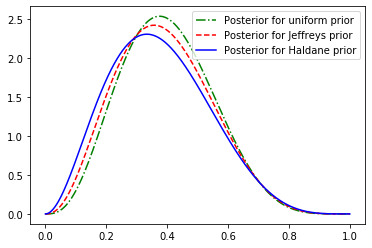

In [23]:
plt.plot(p, likelihood*prior_u/norm_u, 'g-.', label = "Posterior for uniform prior")
plt.plot(p, likelihood*prior_j/norm_j, 'r--', label = "Posterior for Jeffreys prior")
plt.plot(p, likelihood*prior_h/norm_h, 'b-', label = "Posterior for Haldane prior")
plt.legend()
plt.show()

In [38]:
neg_posterior_h = interpol.interp1d(p,-1*likelihood*prior_h,kind='cubic')
neg_posterior_j = interpol.interp1d(p,-1*likelihood*prior_j,kind='cubic')
neg_posterior_u = interpol.interp1d(p,-1*likelihood*prior_u,kind='cubic')

In [40]:
from scipy import optimize
print(optimize.minimize(neg_posterior_u, x0 = 0.375, bounds = [(0.1, 0.9)]).x, 
      optimize.minimize(neg_posterior_j, x0 = 0.375, bounds = [(0.1, 0.9)]).x, 
      optimize.minimize(neg_posterior_h, x0 = 0.375, bounds = [(0.1, 0.9)]).x)

[0.375] [0.35714875] [0.33333345]


# What happens if we have more data?

Montero-Dorta et al. 2008 found that, of 710 red galaxies, 213 had AGN and 497 did not.  What is the probability distribution for the true probability a red (early-type) galaxy has an AGN, $p$, given each prior we considered before?

__What do we want for__ `likelihood` for this case?

__Do the priors change?__

__Redo the normalizations and plot the normalized posteriors for the new likelihood, for each prior we considered.__

__Some things to look for:__

- Where does the posterior peak in each case?  How does this compare to the observed fraction (213/710)?

- For which prior do you get the tightest constraint on $p$?  (Hint: since the integral is one, a tighter distribution will have a higher peak).__


## Using a previous result as a prior

Suppose you've read the Montero-Dorta et al. paper, in which 213 out of 710 red sequence galaxies had AGN. You can treat that result as a prior for future analyses of similar samples.

You then observed that 3 out of 8 galaxies in your sample had AGN.   

__Plot the posterior probability distribution for $p$ when you combine the likelihood from your new sample with the Montero-Dorta prior.__ 

__Compare where it peaks to (3/8) and (213/710)__ ...

# If you have extra time... 

- Choose a particular prior. Plot the posterior distributions if you observed 0 out of 8, 2 out of 8, 3 out of 8, and 4 out of 8 galaxies to have AGN.  Where does the posterior peak in each case?

- Derive an analytic expression for where the posterior will peak, for each choice of prior.  How does this peak compare to the fraction of AGN in the observations?  Check your expression by overplotting your result on the posterior plot as a vertical line, using `plt.axvline`.